<a href="https://colab.research.google.com/github/ParhamPishro/Some-of-Algorithms-in-Data-Science/blob/main/6AssociationRules/6.1Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D

Import and read data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
basket = pd.read_csv('/content/gdrive/My Drive/DataSet/Basket.txt')

Mounted at /content/gdrive


In [ ]:
display(basket.head())
print(basket.shape)

,cardid,ارزش,پرداخت,جنسیت,مالکیت منزل,درآمد,سن,گوشت,مرغ,پیتزا,همبرگر,چیپس,کنسرو,نوشابه,دلستر,آب معدنی,ماهی,کباب
0,39808,42.7123,CHEQUE,M,NO,27000,46,F,T,T,F,F,F,F,F,F,F,T
1,67362,25.3567,CASH,F,NO,30000,28,F,T,F,F,F,F,F,F,F,F,T
2,10872,20.6176,CASH,M,NO,13200,36,F,F,F,T,F,T,T,F,F,T,F
3,26748,23.6883,CARD,F,NO,12200,26,F,F,T,F,F,F,F,T,F,F,F
4,91609,18.8133,CARD,M,YES,11000,24,F,F,F,F,F,F,F,F,F,F,F


(1000, 18)


In [ ]:
basket = basket.drop(columns=['cardid', 'ارزش', 'پرداخت', 'جنسیت', 'مالکیت منزل', 'درآمد', 'سن'])
basket

,گوشت,مرغ,پیتزا,همبرگر,چیپس,کنسرو,نوشابه,دلستر,آب معدنی,ماهی,کباب
0,F,T,T,F,F,F,F,F,F,F,T
1,F,T,F,F,F,F,F,F,F,F,T
2,F,F,F,T,F,T,T,F,F,T,F
3,F,F,T,F,F,F,F,T,F,F,F
4,F,F,F,F,F,F,F,F,F,F,F
...,...,...,...,...,...,...,...,...,...,...,...
995,F,F,F,T,F,F,F,F,F,F,F
996,F,F,F,T,F,F,F,F,F,T,F
997,F,T,F,F,F,F,F,F,F,F,F
998,T,F,F,F,F,F,F,T,F,F,T


In [ ]:
for i in range(len(basket.columns)):
  column = basket.columns[i]
  basket[column][basket[column]=='F'] = False
  basket[column][basket[column]=='T'] = True

basket

,گوشت,مرغ,پیتزا,همبرگر,چیپس,کنسرو,نوشابه,دلستر,آب معدنی,ماهی,کباب
0,False,True,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,True,True,False,False,True,False
3,False,False,True,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,True,False,False,False,False,False,False,False
996,False,False,False,True,False,False,False,False,False,True,False
997,False,True,False,False,False,False,False,False,False,False,False
998,True,False,False,False,False,False,False,True,False,False,True


Grouping into transactions

In [ ]:
#basket.itemDescription = basket.itemDescription.transform(lambda x: [x])
#basket = basket.groupby(['Member_number','Date']).sum(['itemDescription']).reset_index(drop=True)
#encoder = TransactionEncoder()
#transactions = pd.DataFrame(encoder.fit(basket).transform(basket), columns=encoder.columns_)
#display(transactions.head())

Apriori and Association Rules

In [ ]:
frequent_itemsets = apriori(basket, min_support= 0.05, use_colnames=True, max_len = 4)
frequent_itemsets
rules = association_rules(frequent_itemsets, metric="lift",  min_threshold = 1.5)
display(rules.head())
print("Rules identified: ", len(rules))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ماهی),(گوشت),0.292,0.299,0.145,0.496575,1.660787,0.057692,1.392463
1,(گوشت),(ماهی),0.299,0.292,0.145,0.484950,1.660787,0.057692,1.374623
2,(همبرگر),(کنسرو),0.303,0.302,0.173,0.570957,1.890586,0.081494,1.626877
3,(کنسرو),(همبرگر),0.302,0.303,0.173,0.572848,1.890586,0.081494,1.631736
4,(نوشابه),(همبرگر),0.293,0.303,0.167,0.569966,1.881075,0.078221,1.620802


Rules identified:  24


Visualization

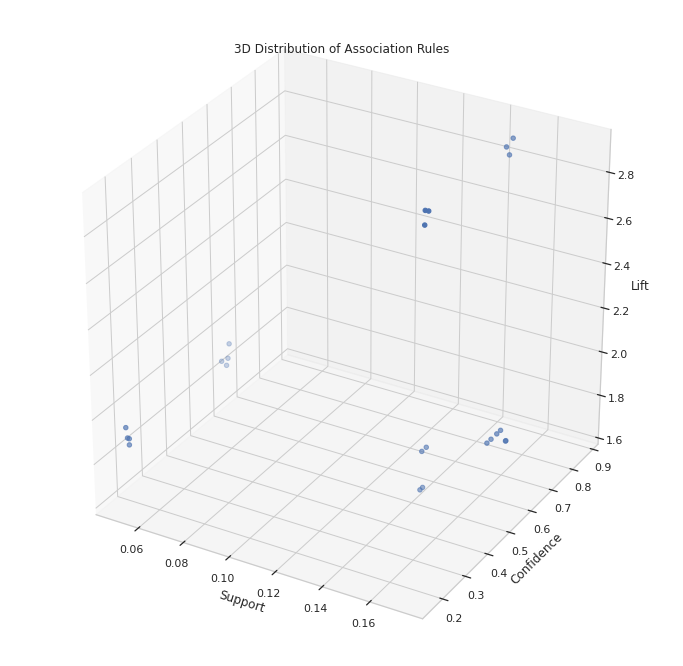

In [ ]:
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()